In [1]:
import sys 
sys.path.append('../') 
from HEEM_VQE import *
from qiskit.providers.ibmq.runtime import UserMessenger
from qiskit import Aer
import matplotlib.pyplot as plt  
from utils import get_backend_connectivity



In [2]:
meta = {
  "name": "HEEM_VQE",
  "description": "Variationa Quantum Eigensolver with hardware efficient entangled measurements",
  "max_execution_time": 300000
}

In [3]:
meta["parameters"] = [
    {"name": "iters", "description": "number of iterations, default=10", "type": "int", "required": False },
    {"name": "pars", "description": "Initial vector of parameters.", "type": "ndarray", "required": False}, 
    {"name": "shots", "description": "Number of shots to take per circuit, default=8192", "type": "int", "required": False},
    {"name": "grouping", "description": "Method for grouping the local observables of the Hamiltonian into compatible measurements: tensor product basis ('TPB') or entangled measurements ('Entangled') , default='TPB'.", "type": "str", "required": False},
    {"name": "conectivity", "description": "Device conectivity.", "type": "list", "required": False}
  ]


meta['return_values'] = [
    {"name": "result", "description": "Final result in a dictionary.", "type": "dict"}
  ]

meta["interim_results"] = [
    {"name": "params", "description": "Energy evaluations", "type": "ndarray"},
  ]


In [4]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-csic', group='internal', project='iff-csic') 

In [5]:
program_id = 'heem-vqe'
provider.runtime.update_program(data='HEEM_VQE.py', metadata=meta, program_id=program_id)

In [6]:
prog = provider.runtime.program(program_id)
print(prog)

heem-vqe:
  Name: HEEM_VQE
  Description: Variationa Quantum Eigensolver with hardware efficient entangled measurements
  Creation date: 2021-10-16T20:48:20Z
  Update date: 2022-02-09T18:50:51.178337Z
  Max execution time: 300000
  Input parameters:
    none
  Interim results:
    none
  Returns:
    none


In [7]:
#backend = provider.backend.ibmq_qasm_simulator
#backend = provider.get_backend('ibm_cairo')
#backend = provider.get_backend('ibm_hanoi')
backend = provider.get_backend('ibmq_guadalupe')
options = {'backend_name': backend.name()}

In [8]:
num_qubits = 8
conectivity = get_backend_connectivity(provider.get_backend('ibmq_guadalupe'))
conectivity = [ indx for indx in conectivity if indx[0]<num_qubits and indx[1]<num_qubits ]
params = 0.01*np.ones(4*num_qubits)

In [9]:
inputs = { "iters": 150 ,
           "grouping": "TPB",
           "shots" : 2**14,
           "conectivity" : conectivity,
           "pars" : params }

In [10]:
#job = provider.runtime.run(program_id, options=options, inputs=inputs )
#job.job_id()

In [11]:
# HEEM 'c7vrthi4m6nn0dv9h6lg'
# EM   'c7vrtk44cps7s5fvslpg'
# TPB  'c7vrtns4cps7s5fvsm80'

In [12]:
# HEEM 'c7uothe9f4djdcduodlg'
# EM   'c7uotoe9f4djdcduodq0'
# TPB  'c7uotre9f4djdcduodsg'

In [13]:
# TPB 'c7ss5me9f4du84ugh55g', 'c7u9iek4cps7s5ftipe0'
# EM  'c7ss5k44cps50qllau2g', 'c7u9iqe9f4djdcdubh8g'
# HEEM 'c7ss5eq4m6nn0dv5qb60', 'c7tb2na4m6nn0dv64kk0', 'c7u9inc4cps7s5ftipjg'

In [26]:
data = 2
if data == 1 :
    name = 'ibm_cairo'
    TPB  = 'c7ss5me9f4du84ugh55g'
    EM   = 'c7ss5k44cps50qllau2g'
    HEEM = 'c7ss5eq4m6nn0dv5qb60'
elif data == 2 :
    name = 'ibmq_guadalupe'
    TPB  = 'c7uotre9f4djdcduodsg'
    EM   = 'c7uotoe9f4djdcduodq0'
    HEEM = 'c7uothe9f4djdcduodlg'
elif data == 3 :
    name = 'ibmq_guadalupe'
    TPB  = 'c7vrtns4cps7s5fvsm80'
    EM   = 'c7vrtk44cps7s5fvslpg'
    HEEM = 'c7vrthi4m6nn0dv9h6lg'

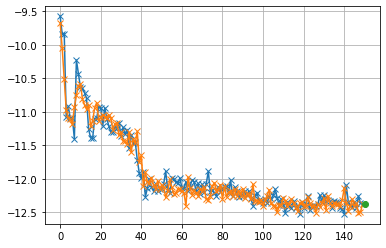

In [27]:
job = provider.runtime.job(HEEM)
results = job.result()
energies = results['values']
energies_HEEM = energies[50:]
energies_plus = energies[50:350:2]
energies_minus = energies[51:351:2]
energy_final = energies[350]
plt.plot(energies_plus,'-x')
plt.plot(energies_minus,'-x')
plt.plot( [150], [energy_final], 'o')
plt.plot()
plt.grid()

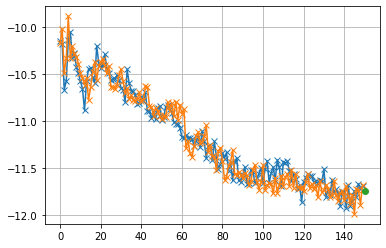

In [28]:
job = provider.runtime.job(EM)
results = job.result()
energies = results['values']
energies_EM = energies[50:]
energies_plus = energies[50:350:2]
energies_minus = energies[51:351:2]
energy_final = energies[350]
plt.plot(energies_plus,'-x')
plt.plot(energies_minus,'-x')
plt.plot( [150], [energy_final], 'o')
plt.plot()
plt.grid()

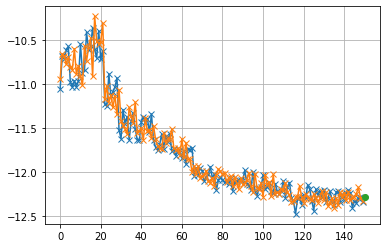

In [29]:
job = provider.runtime.job(TPB)
results = job.result()
energies = results['values']
energies_TPB = energies[50:]
energies_plus = energies[50:350:2]
energies_minus = energies[51:351:2]
energy_final = energies[350]
plt.plot(energies_plus,'-x')
plt.plot(energies_minus,'-x')
plt.plot( [150], [energy_final], 'o')
plt.plot()
plt.grid()

In [30]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [31]:
93, 40, 47

(93, 40, 47)

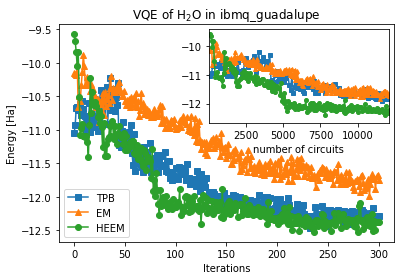

In [38]:
fig, ax = plt.subplots(1, 1)
axins = inset_axes(ax, width=2.5, height=1.3)
ax.plot(energies_TPB,'-s', label='TPB' )
ax.plot(energies_EM,'-^', label='EM' )
ax.plot(energies_HEEM,'-o', label='HEEM' )

ax.set_title( r'VQE of H$_2$O in '+name)
ax.set_xlabel('Iterations')
ax.set_ylabel('Energy [Ha]')

axins.plot( 93*np.arange(1,302), energies_TPB,  '-s', markersize=4 )
axins.plot( 48*np.arange(1,302), energies_EM,   '-^', markersize=4 )
axins.plot( 62*np.arange(1,302), energies_HEEM, '-o', markersize=4 )
axins.set_xlim([1,40*302])
axins.set_xlabel('number of circuits')

ax.legend(loc='lower left')
fig.savefig( 'fig_data_{}_{}.pdf'.format(data, name) )

In [33]:
datos= np.array([energies_TPB, energies_EM, energies_HEEM])
np.save( 'Datos_{}_{}'.format(data, name), datos )